In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn

## Read Data

In [3]:
data = pd.read_csv('udemy_courses.csv')
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


## Data cleaning

Data source: https://www.kaggle.com/andrewmvd/udemy-courses

The dataset contains 12 columns, 3678 rows, each row represents one unique course.\
I will select the following columns as features for modeling:

| Feature name | Feature type |
| -------------|--------------|
| price        | numerical   |
| num_reviews | numerical |
| num_lectures | numerical | 
| content_duration | numerical |
| level | categorical | 
| subject | categorical | 

The following column will be the target to predict using different models: 
| Feature name | Feature type |
| -------------|--------------|
| num_subscribers | numerical |

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


There exist some courses that have 0 in num_lectures and content_duration, meaning that the courses have no content. I remove these courses from the dataframe. 

In [6]:
data = data[data['num_lectures'] > 0]
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [7]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,6.759852e+05,66.062007,3198.020125,156.301605,40.119663,4.095630
std,3.433189e+05,61.009324,9505.263339,935.575723,50.385854,6.054287
min,8.324000e+03,0.000000,0.000000,0.000000,4.000000,0.133333
25%,4.076580e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.880920e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.615080e+05,95.000000,2547.000000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


#### Visualize data

Text(0.5, 1.0, 'content_duration')

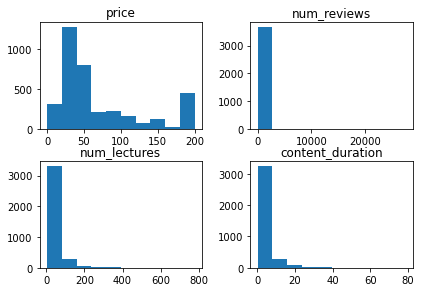

In [8]:
# numerical
fig, axs = plt.subplots(2, 2)
fig.tight_layout()
axs[0, 0].hist(data['price'])
axs[0, 0].set_title('price')
axs[0, 1].hist(data['num_reviews'])
axs[0, 1].set_title('num_reviews')
axs[1, 0].hist(data['num_lectures'])
axs[1, 0].set_title('num_lectures')
axs[1, 1].hist(data['content_duration'])
axs[1, 1].set_title('content_duration')


Text(0.5, 1.0, 'level')

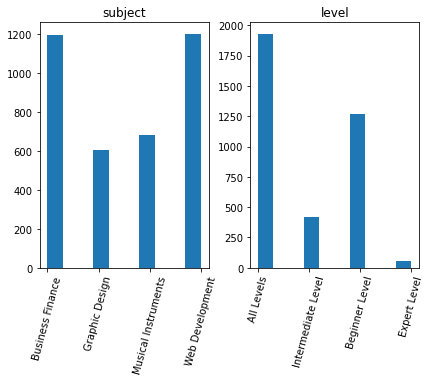

In [9]:
# categorical
fig, axs = plt.subplots(1, 2)
fig.tight_layout()

axs[0].hist(data['subject']); axs[0].tick_params(axis='x', labelrotation = 75)
axs[0].set_title('subject')
axs[1].hist(data['level']); axs[1].tick_params(axis='x', labelrotation = 75)
axs[1].set_title('level')

From the histograms, most of the features, especially numerical ones, are skewed to the right. To improve model performance, I will resolve the skewness after splitting features and labels. 

## Data splitting and preprocessing
First, split the data into training and testing sets.

In [10]:
feature_names = ['price', 'num_reviews', 'num_lectures', 'content_duration', 'level', 'subject']
X = data[feature_names]
y = data['num_subscribers']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
numerical_features = feature_names[:4]
categorical_features = feature_names[-2:]

#### Scaling

To handle the right skewness found in numerical features, I take log of these 4 features to tranform them. 

In [13]:
X_train_log = X_train
X_test_log = X_test

for feature in numerical_features:
    X_train_log[feature] = np.log(X_train_log[feature])
    X_test_log[feature] = np.log(X_test_log[feature])
X_train_log

/Users/fiona/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-13-07f9611a7566>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_log[feature] = np.log(X_train_log[feature])
<ipython-input-13-07f9611a7566>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_log[feature] = np.log(X_test_log[feature])


,price,num_reviews,num_lectures,content_duration,level,subject
1645,3.218876,-inf,2.484907,0.693147,All Levels,Graphic Design
168,2.995732,3.526361,3.526361,0.405465,All Levels,Business Finance
3410,5.273000,4.060443,4.564348,2.525729,All Levels,Web Development
963,2.995732,1.945910,3.526361,1.791759,Beginner Level,Business Finance
946,5.192957,3.761200,5.655992,3.384390,All Levels,Business Finance
...,...,...,...,...,...,...
1131,4.605170,2.639057,2.833213,0.405465,Beginner Level,Business Finance
1295,4.553877,2.484907,3.332205,0.000000,Beginner Level,Graphic Design
860,3.912023,2.484907,3.258097,1.098612,All Levels,Business Finance
3508,4.605170,4.828314,4.477337,1.945910,Beginner Level,Web Development


Taking log of 0 can lead to negative infinity or NaN, therefore I filled NaN and -inf with 0. 

In [14]:
import math

X_train_log = X_train_log.replace(-math.inf, 0)
X_test_log = X_test_log.replace(-math.inf, 0)

X_train_log = X_train_log.fillna(0)
X_test_log = X_test_log.fillna(0)

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

X_train_scaled = X_train_log
X_test_scaled = X_test_log
scaler = StandardScaler().fit(X_train_scaled[numerical_features])
X_train_scaled[numerical_features] = scaler.transform(X_train_scaled[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test_scaled[numerical_features])

In [16]:
X_train_scaled.describe()

,price,num_reviews,num_lectures,content_duration
count,2.573000e+03,2.573000e+03,2.573000e+03,2.573000e+03
mean,-1.845050e-16,4.389113e-16,7.145470e-17,1.662098e-16
std,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00
min,-2.721906e+00,-1.507517e+00,-2.246030e+00,-3.144428e+00
25%,-4.736290e-01,-7.917684e-01,-6.861609e-01,-9.748835e-01
50%,1.349686e-01,-1.520769e-02,-8.331022e-02,-2.285381e-01
75%,6.957480e-01,6.633810e-01,6.103660e-01,6.446300e-01
max,1.254446e+00,3.769075e+00,3.975384e+00,3.695289e+00


Text(0.5, 1.0, 'content_duration')

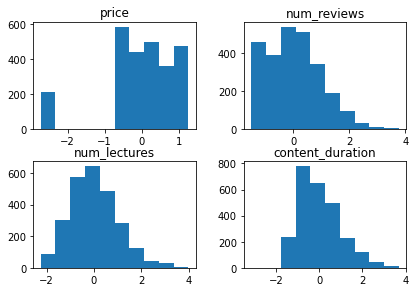

In [17]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout()
axs[0, 0].hist(X_train_scaled['price'])
axs[0, 0].set_title('price')
axs[0, 1].hist(X_train_scaled['num_reviews'])
axs[0, 1].set_title('num_reviews')
axs[1, 0].hist(X_train_scaled['num_lectures'])
axs[1, 0].set_title('num_lectures')
axs[1, 1].hist(X_train_scaled['content_duration'])
axs[1, 1].set_title('content_duration')


#### Category Encoding

In [18]:
X_train_scaled['level'].unique()

array(['All Levels', 'Beginner Level', 'Intermediate Level',
       'Expert Level'], dtype=object)

In [19]:
# Ordinal Encoder: categorical feature --> numerical feature
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

X_train_cat = X_train_scaled
X_test_cat = X_test_scaled
encoder = OrdinalEncoder(categories=[['All Levels', 'Beginner Level', 'Intermediate Level', 'Expert Level']]).fit(X_train_cat[['level']])
X_train_cat['level'] = encoder.transform(X_train_cat[['level']])
X_test_cat['level'] = encoder.transform(X_test_cat[['level']])

encoder.categories_


[array(['All Levels', 'Beginner Level', 'Intermediate Level',
        'Expert Level'], dtype=object)]

In [20]:
X_train_scaled['subject'].unique()

array(['Graphic Design', 'Business Finance', 'Web Development',
       'Musical Instruments'], dtype=object)

In [21]:
# Ordinal Encoder: categorical feature --> numerical feature

oh_encoder = OneHotEncoder().fit(X_train_cat[['subject']])
X_train_encoded = oh_encoder.transform(X_train_cat[['subject']])
X_test_encoded = oh_encoder.transform(X_test_cat[['subject']])

oh_encoder.get_feature_names()

array(['x0_Business Finance', 'x0_Graphic Design',
       'x0_Musical Instruments', 'x0_Web Development'], dtype=object)

In [22]:
X_train_cat

,price,num_reviews,num_lectures,content_duration,level,subject
1645,-0.306161,-1.507517,-0.949504,-0.228538,0.0,Graphic Design
168,-0.473629,0.313156,0.279568,-0.538299,0.0,Business Finance
3410,1.235445,0.588904,1.504548,1.744692,0.0,Web Development
963,-0.473629,-0.502837,0.279568,0.954391,1.0,Business Finance
946,1.175373,0.434404,2.792851,2.669255,0.0,Business Finance
...,...,...,...,...,...,...
1131,0.734243,-0.144962,-0.538450,-0.538299,1.0,Business Finance
1295,0.695748,-0.224551,0.050435,-0.974884,1.0,Graphic Design
860,0.214041,-0.224551,-0.037024,0.208046,0.0,Business Finance
3508,0.734243,0.985359,1.401862,1.120373,1.0,Web Development


In [25]:
X_train_ecd = pd.DataFrame(X_train_encoded.toarray(), columns=oh_encoder.get_feature_names())
X_test_ecd = pd.DataFrame(X_test_encoded.toarray(), columns=oh_encoder.get_feature_names())
X_train_ecd

,x0_Business Finance,x0_Graphic Design,x0_Musical Instruments,x0_Web Development
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
2568,1.0,0.0,0.0,0.0
2569,0.0,1.0,0.0,0.0
2570,1.0,0.0,0.0,0.0
2571,0.0,0.0,0.0,1.0


In [26]:
X_train_preprocessed = X_train_cat.merge(X_train_ecd, how='inner', on=X_train_cat.index).drop(columns=['subject', 'key_0'])
X_test_preprocessed = X_test_cat.merge(X_test_ecd, how='inner', on=X_test_cat.index).drop(columns=['subject', 'key_0'])
X_train_preprocessed

,price,num_reviews,num_lectures,content_duration,level,x0_Business Finance,x0_Graphic Design,x0_Musical Instruments,x0_Web Development
0,-0.306161,-1.507517,-0.949504,-0.228538,0.0,0.0,1.0,0.0,0.0
1,-0.473629,0.313156,0.279568,-0.538299,0.0,1.0,0.0,0.0,0.0
2,1.235445,0.588904,1.504548,1.744692,0.0,0.0,0.0,0.0,1.0
3,-0.473629,-0.502837,0.279568,0.954391,1.0,1.0,0.0,0.0,0.0
4,1.175373,0.434404,2.792851,2.669255,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2568,0.734243,-0.144962,-0.538450,-0.538299,1.0,1.0,0.0,0.0,0.0
2569,0.695748,-0.224551,0.050435,-0.974884,1.0,0.0,1.0,0.0,0.0
2570,0.214041,-0.224551,-0.037024,0.208046,0.0,1.0,0.0,0.0,0.0
2571,0.734243,0.985359,1.401862,1.120373,1.0,0.0,0.0,0.0,1.0


## Modeling

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

performance = []

Ridge Regression

In [28]:
# Ridge regression: include the multicollinearity of features
from sklearn.linear_model import Ridge, LinearRegression

ridge_reg = Ridge(fit_intercept=True, random_state=42).fit(X_train_preprocessed, y_train)
scr = ridge_reg.score(X_test_preprocessed, y_test)
mse = mean_squared_error(y_test, ridge_reg.predict(X_test_preprocessed))
mae = mean_absolute_error(y_test, ridge_reg.predict(X_test_preprocessed))

ridge_stats = {}
ridge_stats['model_name'] = 'Ridge Regrssion'
ridge_stats['min'] = float('%.3f' % ridge_reg.coef_.min())
ridge_stats['max'] = float('%.3f' % ridge_reg.coef_.max())
ridge_stats['mean_abs'] = float('%.3f' % np.abs(ridge_reg.coef_).mean())
ridge_stats['n_zero'] = np.sum(ridge_reg.coef_ == 0)
ridge_stats['test_score'] = float('%.3f' % scr)
ridge_stats['MSE'] = float('%.3f' % mse)
ridge_stats['MAE'] = float('%.3f' % mae)
performance.append(ridge_stats)

print(f'R-squared score: {scr}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


R-squared score: 0.2847869650654429
Mean Absolute Error: 3761.7501331996655
Mean Squared Error: 40004815.991422266


In [29]:
features = X_train_preprocessed.columns
for idx, importance in enumerate(ridge_reg.coef_):
    print(f"{features[idx]}: %.5f" %  importance)

price: -1415.22590
num_reviews: 4655.56240
num_lectures: -458.61315
content_duration: 756.60608
level: -520.60200
x0_Business Finance: -596.83601
x0_Graphic Design: -127.76557
x0_Musical Instruments: 603.93192
x0_Web Development: 120.66967


In [43]:
top = np.argmax(ridge_reg.coef_)
print(f'Top feature: {features[top]}, {ridge_reg.coef_[top]}')

Top feature: num_reviews, 4655.562396855505


Polynomial Regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2, include_bias=True).fit(X_train_preprocessed)
X_train_pf = pf.transform(X_train_preprocessed)
X_test_pf = pf.transform(X_test_preprocessed)

In [49]:
poly_linear = Ridge(fit_intercept=True, random_state=42).fit(X_train_pf, y_train)
scr = poly_linear.score(X_test_pf, y_test)
mse = mean_squared_error(y_test, poly_linear.predict(X_test_pf))
mae = mean_absolute_error(y_test, poly_linear.predict(X_test_pf))

poly_stats = {}
poly_stats['model_name'] = 'Polynomial Regrssion'
poly_stats['min'] = float('%.3f' % poly_linear.coef_.min())
poly_stats['max'] = float('%.3f' % poly_linear.coef_.max())
poly_stats['mean_abs'] = float('%.3f' % np.abs(poly_linear.coef_).mean())
poly_stats['n_zero'] = np.sum(poly_linear.coef_ == 0)
poly_stats['test_score'] = float('%.3f' % scr)
poly_stats['MSE'] = float('%.3f' % mse)
poly_stats['MAE'] = float('%.3f' % mae)
performance.append(poly_stats)

print(f'R-squared score: {scr}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

R-squared score: 0.5384356294419581
Mean Absolute Error: 3162.1319272510814
Mean Squared Error: 25817199.64606162


In [50]:
poly_linear.coef_.max()

3352.7503957019358

Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42, max_depth=4).fit(X_train_preprocessed, y_train)
scr = tree_reg.score(X_test_preprocessed, y_test)
mse = mean_squared_error(y_test, tree_reg.predict(X_test_preprocessed))
mae = mean_absolute_error(y_test, tree_reg.predict(X_test_preprocessed))

tree_stats = {}
tree_stats['model_name'] = 'Decision Tree'
tree_stats['min'] = float('%.3f' % tree_reg.feature_importances_.min())
tree_stats['max'] = float('%.3f' % tree_reg.feature_importances_.max())
tree_stats['mean_abs'] = float('%.3f' % np.abs(tree_reg.feature_importances_).mean())
tree_stats['n_zero'] = np.sum(tree_reg.feature_importances_ == 0)
tree_stats['test_score'] = float('%.3f' % scr)
tree_stats['MSE'] = float('%.3f' % mse)
tree_stats['MAE'] = float('%.3f' % mae)
performance.append(tree_stats)

print(f'R-squared score: {scr}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

R-squared score: 0.5799965999284805
Mean Absolute Error: 2102.0056728945515
Mean Squared Error: 23492523.087432634


In [34]:
features = X_train_preprocessed.columns
for idx, importance in enumerate(tree_reg.feature_importances_):
    print(f"{features[idx]}: %.5f" %  importance)

price: 0.13214
num_reviews: 0.84641
num_lectures: 0.00568
content_duration: 0.01578
level: 0.00000
x0_Business Finance: 0.00000
x0_Graphic Design: 0.00000
x0_Musical Instruments: 0.00000
x0_Web Development: 0.00000


In [47]:
top = np.argmax(tree_reg.feature_importances_)
print(f'Top feature: {features[top]}, {tree_reg.feature_importances_[top]}')

Top feature: num_reviews, 0.846405350601932


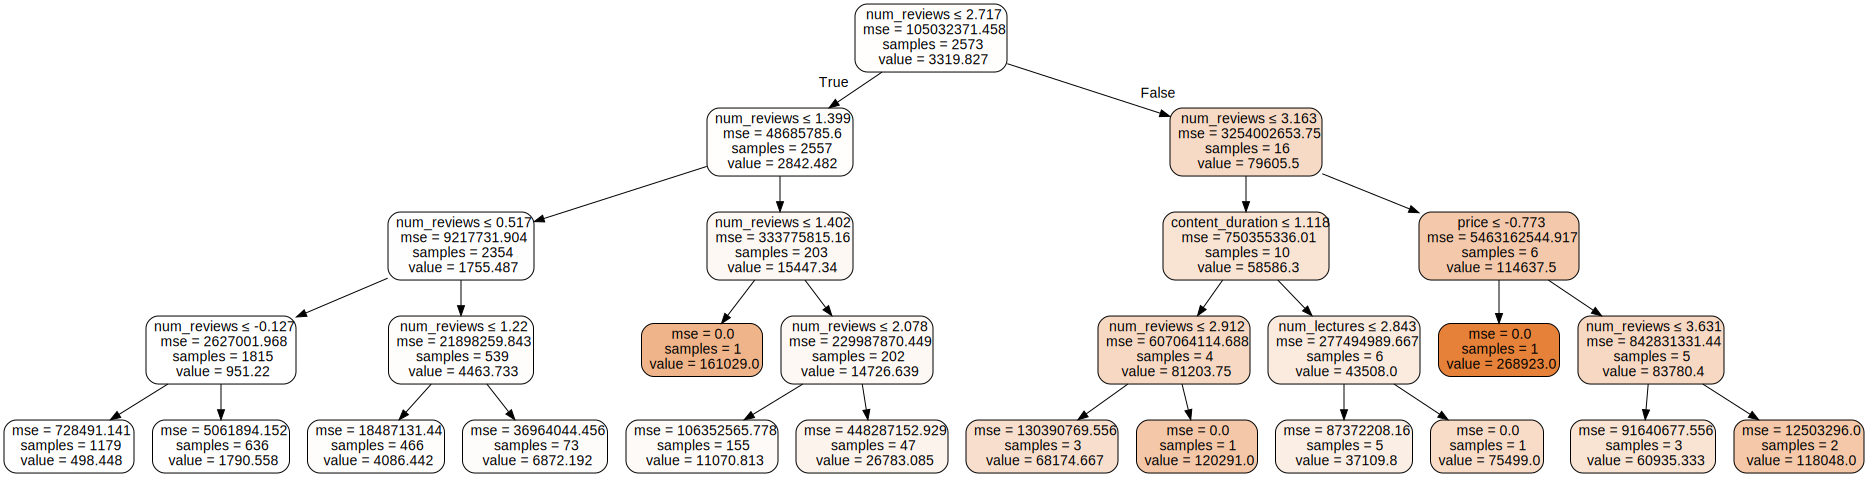

In [35]:
import graphviz

tree_reg_graph = sklearn.tree.export_graphviz(tree_reg, 
                      out_file=None, 
                      feature_names=features,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(tree_reg_graph)  
graph 

Random Forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=4, random_state=42).fit(X_train_preprocessed, y_train)
scr = rf_reg.score(X_test_preprocessed, y_test)
mse = mean_squared_error(y_test, rf_reg.predict(X_test_preprocessed))
mae = mean_absolute_error(y_test, rf_reg.predict(X_test_preprocessed))

rf_stats = {}
rf_stats['model_name'] = 'Random Forest'
rf_stats['min'] = float('%.3f' % rf_reg.feature_importances_.min())
rf_stats['max'] = float('%.3f' % rf_reg.feature_importances_.max())
rf_stats['mean_abs'] = float('%.3f' % np.abs(rf_reg.feature_importances_).mean())
rf_stats['n_zero'] = np.sum(rf_reg.feature_importances_ == 0)
rf_stats['test_score'] = float('%.3f' % scr)
rf_stats['MSE'] = float('%.3f' % mse)
rf_stats['MAE'] = float('%.3f' % mae)
performance.append(rf_stats)

print(f'R-squared score: {scr}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

R-squared score: 0.6331845511565213
Mean Absolute Error: 1985.8216451792582
Mean Squared Error: 20517501.52335668


In [37]:
features = X_train_preprocessed.columns
for idx, importance in enumerate(rf_reg.feature_importances_):
    print(f"{features[idx]}: %.5f" % importance)

price: 0.06597
num_reviews: 0.83072
num_lectures: 0.05292
content_duration: 0.04109
level: 0.00296
x0_Business Finance: 0.00013
x0_Graphic Design: 0.00034
x0_Musical Instruments: 0.00392
x0_Web Development: 0.00193


In [48]:
top = np.argmax(rf_reg.feature_importances_)
print(f'Top feature: {features[top]}, {rf_reg.feature_importances_[top]}')

Top feature: num_reviews, 0.8307215600678799


#### Feature Selection

In [39]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

feature_selector = SelectKBest(score_func=f_regression, k='all').fit(X_train_preprocessed, y_train)
X_train_fs = feature_selector.transform(X_train_preprocessed)
X_test_fs = feature_selector.transform(X_test_preprocessed)

features = X_train_preprocessed.columns
scores = np.argsort(feature_selector.scores_)
for idx in range(len(scores)-1, -1, -1):
    print(f"{features[scores[idx]]}: %.5f" %  feature_selector.scores_[scores[idx]])

num_reviews: 742.84994
x0_Web Development: 154.95404
content_duration: 70.33803
num_lectures: 57.15275
price: 55.52644
x0_Business Finance: 31.73686
x0_Musical Instruments: 23.97233
x0_Graphic Design: 9.55708
level: 7.93497


Text(0, 0.5, 'F-value from correlation value')

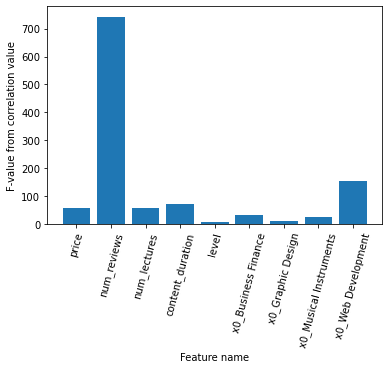

In [40]:
plt.bar(features, feature_selector.scores_)
plt.xticks(features, rotation=75)
plt.xlabel('Feature name')
plt.ylabel('F-value from correlation value')

In [41]:
fs = SelectKBest(score_func=f_regression, k=3).fit(X_train_preprocessed, y_train)
X_train_fs = fs.transform(X_train_preprocessed)
X_test_fs = fs.transform(X_test_preprocessed)

selected_features = ['num_reviews', 'x0_Web Development', 'content_duration']
selected_reg = DecisionTreeRegressor(random_state=42, max_depth=2).fit(X_train_preprocessed[selected_features], y_train)
selected_reg.score(X_test_preprocessed[selected_features], y_test)

0.40093108979614467

## Result Analysis

#### Performance Comparison

In [42]:
pd.DataFrame(performance)

,model_name,min,max,mean_abs,n_zero,test_score,MSE,MAE
0,Ridge Regrssion,-1415.226,4655.562,1028.424,0,0.285,4.000482e+07,3761.750
1,Polynomial Regrssion,-1952.555,3352.750,483.883,7,0.538,2.581720e+07,3162.132
2,Decision Tree,0.000,0.846,0.111,5,0.580,2.349252e+07,2102.006
3,Random Forest,0.000,0.831,0.111,0,0.633,2.051750e+07,1985.822


#### Error Analysis

In [445]:
# Ridge Regression
prediction = ridge_reg.predict(X_test_preprocessed[:2])
print(f'pred: {prediction[0]}, truth: {y_test.iloc[0]}')
print(f'pred: {prediction[1]}, truth: {y_test.iloc[1]}')
pd.DataFrame(X_test_preprocessed[:2])

pred: 727.6185896237016, truth: 22
pred: -449.7085945430845, truth: 32


,price,num_reviews,num_lectures,content_duration,level,x0_Business Finance,x0_Graphic Design,x0_Musical Instruments,x0_Web Development
0,0.214041,-0.791768,-0.289073,0.374027,0.0,0.0,0.0,1.0,0.0
1,0.734243,-0.791768,-0.289073,0.758077,0.0,0.0,1.0,0.0,0.0


In [446]:
# Polynomial Regression
prediction = poly_linear.predict(X_test_pf[:2])
print(f'pred: {prediction[0]}, truth: {y_test.iloc[0]}')
print(f'pred: {prediction[1]}, truth: {y_test.iloc[1]}')
pd.DataFrame(X_test_preprocessed[:2])

pred: -1500.1661938763114, truth: 22
pred: -1840.1347816938896, truth: 32


,price,num_reviews,num_lectures,content_duration,level,x0_Business Finance,x0_Graphic Design,x0_Musical Instruments,x0_Web Development
0,0.214041,-0.791768,-0.289073,0.374027,0.0,0.0,0.0,1.0,0.0
1,0.734243,-0.791768,-0.289073,0.758077,0.0,0.0,1.0,0.0,0.0


In [447]:
# Decesion Tree Regressor
prediction = tree_reg.predict(X_test_preprocessed[:2])
print(f'pred: {prediction[0]}, truth: {y_test.iloc[0]}')
print(f'pred: {prediction[1]}, truth: {y_test.iloc[1]}')
pd.DataFrame(X_test_preprocessed[:2])

pred: 498.4478371501272, truth: 22
pred: 498.4478371501272, truth: 32


,price,num_reviews,num_lectures,content_duration,level,x0_Business Finance,x0_Graphic Design,x0_Musical Instruments,x0_Web Development
0,0.214041,-0.791768,-0.289073,0.374027,0.0,0.0,0.0,1.0,0.0
1,0.734243,-0.791768,-0.289073,0.758077,0.0,0.0,1.0,0.0,0.0


In [448]:
# Random Forest Regressor
prediction = rf_reg.predict(X_test_preprocessed[:2])
print(f'pred: {prediction[0]}, truth: {y_test.iloc[0]}')
print(f'pred: {prediction[1]}, truth: {y_test.iloc[1]}')
pd.DataFrame(X_test_preprocessed[:2])

pred: 459.8148030609281, truth: 22
pred: 459.8148030609281, truth: 32


,price,num_reviews,num_lectures,content_duration,level,x0_Business Finance,x0_Graphic Design,x0_Musical Instruments,x0_Web Development
0,0.214041,-0.791768,-0.289073,0.374027,0.0,0.0,0.0,1.0,0.0
1,0.734243,-0.791768,-0.289073,0.758077,0.0,0.0,1.0,0.0,0.0
